**아래 방법들을 종합적으로 고려하여 최종 데이터셋을 만들기 위한 주요 변수들을 선정**

##**Libraries**

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.6/500.6 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler 


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor, plot_importance
from sklearn.compose import ColumnTransformer

In [3]:
#한글 폰트 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## **Data Loading**

In [4]:
# 데이터셋 로딩

In [4]:
df = pd.read_csv('2조Data.csv',thousands=',',encoding = 'cp949')

In [5]:
df

,호선,역이름,무임승하차비율,무임승하차,유임승하차,출퇴근시간 이용객수,출퇴근시간 제외한 이용객수,역간거리(km),지역,행정동,...,자동차수,통근 통학시 지하철 이용 비율,250m내 버스정류장 수,자치구별 지하철역 개수,자동차세,재산세,지방소득세(2020),지역별 기초수급자 비율,차 1대당 석유사용량,"2020 세금평균(자동차, 재산,지방소득)"
0,1호선,동대문,29.746110,256357.72050,6.054616e+05,201212.7912,6.684911e+05,0.60,종로구,창신동,...,50533.0,30.4,5.0,15.0,9781,101544,464908,0.002775,0.2675,192078.0
1,1호선,동묘앞,46.742445,285406.89250,3.251878e+05,139446.4615,4.594895e+05,0.70,종로구,숭인동,...,50533.0,30.4,8.0,15.0,9781,101544,464908,0.003191,0.2675,192078.0
2,1호선,서울역,13.291690,392607.18280,2.561172e+06,965310.6264,2.019218e+06,1.10,중구,회현동,...,58919.0,41.1,10.0,24.0,10353,150957,853522,0.003666,1.2096,338277.0
3,1호선,시청,13.331403,183237.73120,1.191244e+06,522431.5495,8.439801e+05,1.00,중구,소곡동,...,58919.0,41.1,7.0,24.0,10353,150957,853522,0.000388,1.2096,338277.0
4,1호선,신설동,25.844703,225766.44080,6.477837e+05,301949.8242,5.763451e+05,0.90,동대문구,용신동,...,98441.0,32.1,11.0,14.0,18247,68342,59508,0.004825,0.5779,48699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,9호선,중앙보훈병원,28.942928,126206.29090,3.098460e+05,195012.0000,3.519100e+05,1.14,강동구,둔촌동,...,152283.0,38.2,5.0,13.0,27354,117372,99745,0.001188,0.3162,81490.0
295,9호선,증미,20.008393,79732.61291,3.187632e+05,155765.2418,2.490532e+05,0.70,강서구,가양3동,...,207008.0,36.1,3.0,23.0,35002,115943,143479,0.004130,3.3344,98141.0
296,9호선,한성백제,19.469076,23511.60000,9.725222e+04,49416.0000,9.538300e+04,1.14,송파구,방이2동,...,249843.0,42.7,3.0,29.0,50715,309537,363480,0.001426,0.7149,241244.0
297,9호선,흑석(중앙대입구),18.573893,102697.66670,4.502164e+05,170776.6264,3.906195e+05,1.10,동작구,흑석동,...,106503.0,43.3,8.0,17.0,21743,83726,73671,0.002224,0.2838,59713.0


In [6]:
df.isnull().sum()

호선                         1
역이름                        1
무임승하차비율                    1
무임승하차                      1
유임승하차                      1
출퇴근시간 이용객수                 1
출퇴근시간 제외한 이용객수             1
역간거리(km)                   1
지역                         1
행정동                        1
노인인구비율                     1
노인인구수                      1
평균연령                       1
인구수(사분위수)                  1
인구밀도 (명/㎢)                 1
지역별통근인원비율(12세 이상)          1
지역내총생산(2016)(백만원)          1
자치구별 재난지원금 대상자 비율          1
석유사용량(bbl)                 1
교통안전지수                     1
자동차수                       1
통근 통학시 지하철 이용 비율           1
250m내 버스정류장 수              1
자치구별 지하철역 개수               1
자동차세                       0
재산세                        0
지방소득세(2020)                0
지역별 기초수급자 비율               1
차 1대당 석유사용량                1
2020 세금평균(자동차, 재산,지방소득)    1
dtype: int64

In [7]:
df.dropna(inplace = True)

df.isnull().sum()

호선                         0
역이름                        0
무임승하차비율                    0
무임승하차                      0
유임승하차                      0
출퇴근시간 이용객수                 0
출퇴근시간 제외한 이용객수             0
역간거리(km)                   0
지역                         0
행정동                        0
노인인구비율                     0
노인인구수                      0
평균연령                       0
인구수(사분위수)                  0
인구밀도 (명/㎢)                 0
지역별통근인원비율(12세 이상)          0
지역내총생산(2016)(백만원)          0
자치구별 재난지원금 대상자 비율          0
석유사용량(bbl)                 0
교통안전지수                     0
자동차수                       0
통근 통학시 지하철 이용 비율           0
250m내 버스정류장 수              0
자치구별 지하철역 개수               0
자동차세                       0
재산세                        0
지방소득세(2020)                0
지역별 기초수급자 비율               0
차 1대당 석유사용량                0
2020 세금평균(자동차, 재산,지방소득)    0
dtype: int64

## **상관계수 0.1 이상 , 다중공선성 검증 (VIF)**

상관계수 0.1 이상

In [8]:
# 무임승하차수와 다른 피처들과의 상관계수 확인
corr_with_target = df.corrwith(df['무임승하차']).abs().sort_values(ascending = False)
corr_with_target

무임승하차                      1.000000
출퇴근시간 제외한 이용객수             0.724782
출퇴근시간 이용객수                 0.677748
유임승하차                      0.652643
250m내 버스정류장 수              0.280938
무임승하차비율                    0.261382
자치구별 지하철역 개수               0.226735
지역별통근인원비율(12세 이상)          0.204193
평균연령                       0.194496
노인인구비율                     0.177797
자동차수                       0.176656
지역별 기초수급자 비율               0.176445
자동차세                       0.162933
역간거리(km)                   0.161434
석유사용량(bbl)                 0.134878
통근 통학시 지하철 이용 비율           0.133556
자치구별 재난지원금 대상자 비율          0.129932
차 1대당 석유사용량                0.125290
교통안전지수                     0.114848
재산세                        0.098298
2020 세금평균(자동차, 재산,지방소득)    0.077050
인구밀도 (명/㎢)                 0.072375
지방소득세(2020)                0.059947
지역내총생산(2016)(백만원)          0.053971
노인인구수                      0.015438
인구수(사분위수)                  0.005417
dtype: float64

In [9]:
# 상관계수가 0.1 이상인 변수들 확인 
corr_with_target[corr_with_target >= 0.1 ]

무임승하차                 1.000000
출퇴근시간 제외한 이용객수        0.724782
출퇴근시간 이용객수            0.677748
유임승하차                 0.652643
250m내 버스정류장 수         0.280938
무임승하차비율               0.261382
자치구별 지하철역 개수          0.226735
지역별통근인원비율(12세 이상)     0.204193
평균연령                  0.194496
노인인구비율                0.177797
자동차수                  0.176656
지역별 기초수급자 비율          0.176445
자동차세                  0.162933
역간거리(km)              0.161434
석유사용량(bbl)            0.134878
통근 통학시 지하철 이용 비율      0.133556
자치구별 재난지원금 대상자 비율     0.129932
차 1대당 석유사용량           0.125290
교통안전지수                0.114848
dtype: float64

Text(0.5, 0, 'Correlation')

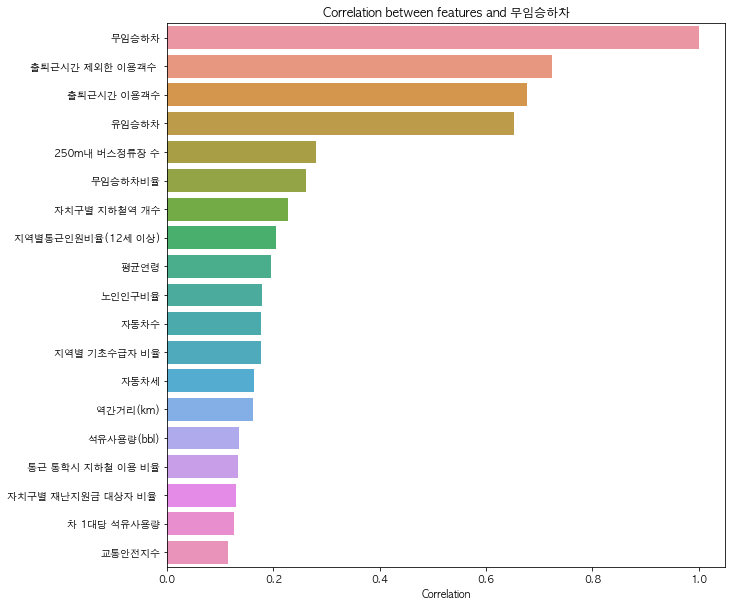

In [10]:
# 무임승하차수와 상관계수 0.1 이상인 피처들 그래프로 확인 
plt.figure(figsize=(10,10))

sns.barplot(x = corr_with_target[corr_with_target >= 0.1] ,
            y = corr_with_target[corr_with_target >= 0.1]
            .index).set_title('Correlation between features and 무임승하차')
plt.xlabel('Correlation')

In [11]:
# 무임승하차수와 상관계수 0.1 이상인 피처들  
select_cols = corr_with_target[corr_with_target >= 0.1].drop('무임승하차').index

<function matplotlib.pyplot.show(close=None, block=None)>

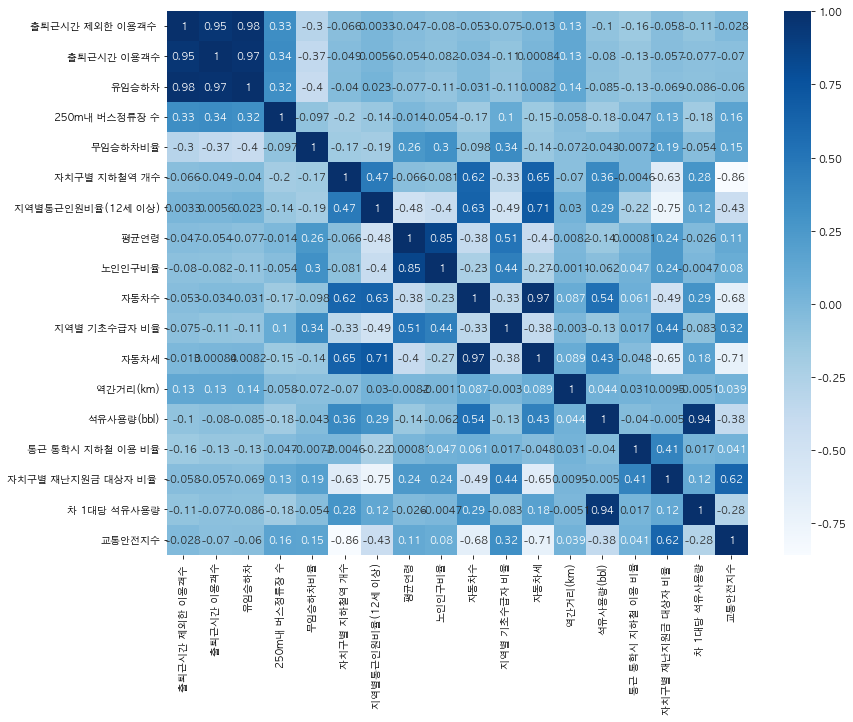

In [12]:
# Heatmap 확인
plt.figure(figsize=(13,10))
corr = df[select_cols].corr(method = 'pearson')
sns.heatmap(corr, annot=True, cmap = plt.cm.Blues)
plt.show

다중공선성 검정(VIF)

히트맵을 봤을 때, 독립변수 간 높은 상관관계가 있으므로 VIF를 통해 다중공선성 확인 (VIF가 10보다 크면 다중공선성이 있다고 판단)


In [13]:
lr = LinearRegression()

x_data = df[select_cols] # select_cols : target과의 상관계수가 0.1 이상인 features
target = df['무임승하차']

# 상수항  추가
x_data = sm.add_constant(x_data, has_constant='add')

# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  무임승하차   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     73.73
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           9.14e-95
Time:                        20:57:12   Log-Likelihood:                -3607.0
No. Observations:                 298   AIC:                             7252.
Df Residuals:                     279   BIC:                             7322.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.163e+04   2.51e+05      0.206      0.837   -4.42e+05    5.45e+05
출퇴근시간 제외한 이용객수         0.2238      0.031      7.270      0.000       0.163       0.284
출퇴근시간 이용객수             0.2554      0.046      5.512      0.000       0.164       0.347
유임승하차                 -0.1389      0.031     -4.505      0.000      -0.200      -0.078
250m내 버스정류장 수        528.3658    779.109      0.678      0.498   -1005.313    2062.045
무임승하차비율             6996.5367    547.232     12.785      0.000    5919.308    8073.765
자치구별 지하철역 개수       -1007.4630    862.099     -1.169      0.244   -2704.508     689.582
지역별통근인원비율(12세 이상)  -3.471e+05   3.08e+05     -1.129      0.260   -9.53e+05    2.58e+05
평균연령                2794.1174   2184.133      1.279      0.202   -1505.355    7093.590
노인인구비율              5899.9477   1.51e+05      0.039      0.969   -2.91e+05    3.03e+05
자동차수                  -0.3274      0.291     -1.125      0.262      -0.900       0.246
지역별 기초수급자 비율       -7.421e+05   2.32e+06     -0.320      0.749   -5.31e+06    3.83e+06
자동차세                   1.3083      1.281      1.021      0.308      -1.214       3.830
역간거리(km)            2.252e+04   6750.517      3.336      0.001    9229.849    3.58e+04
석유사용량(bbl)             0.0790      0.127      0.623      0.534      -0.171       0.329
통근 통학시 지하철 이용 비율     271.6914    766.883      0.354      0.723   -1237.920    1781.303
자치구별 재난지원금 대상자 비율     77.7463    736.384      0.106      0.916   -1371.829    1527.321
차 1대당 석유사용량        -1.063e+04   2.37e+04     -0.449      0.654   -5.73e+04     3.6e+04
교통안전지수              -727.5902   1888.438     -0.385      0.700   -4444.987    2989.806
==============================================================================
Omnibus:                       62.041   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.612
Skew:                          -0.344   Prob(JB):                    7.70e-173
Kurtosis:                      10.960   Cond. No.                     1.25e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,9182.400455,const
1,41.384035,출퇴근시간 제외한 이용객수
2,19.972685,출퇴근시간 이용객수
3,68.860943,유임승하차
4,1.272684,250m내 버스정류장 수
5,1.913920,무임승하차비율
6,5.254399,자치구별 지하철역 개수
7,5.167558,지역별통근인원비율(12세 이상)
8,5.495441,평균연령
9,4.315018,노인인구비율


In [16]:
# VIF가 10이상인 변수들 중 높은 것부터 하나씩 제거 : 아래 변수들은 전체적으로 VIF가 10 이하로 낮아질 때까지 제거한 변수들
vif = pd.DataFrame()
select_x_data = x_data.drop(['유임승하차','출퇴근시간 이용객수','석유사용량(bbl)','자동차세'], axis=1) # feature 제거
vif["VIF Factor"] = [variance_inflation_factor(select_x_data.values, i) for i in range(select_x_data.shape[1])]
vif["features"] = select_x_data.columns
vif

,VIF Factor,features
0,7652.262196,const
1,1.336543,출퇴근시간 제외한 이용객수
2,1.227875,250m내 버스정류장 수
3,1.333615,무임승하차비율
4,4.890111,자치구별 지하철역 개수
5,4.989824,지역별통근인원비율(12세 이상)
6,5.458418,평균연령
7,4.235950,노인인구비율
8,3.680850,자동차수
9,1.795855,지역별 기초수급자 비율


In [17]:
# target과의 상관계수가 0.1 이상이면서, 다중회귀분석에서 target에 유의하다고  판단된 feature들만 포함한 데이터
x_data = select_x_data 
target = df['무임승하차']
x_data

,const,출퇴근시간 제외한 이용객수,250m내 버스정류장 수,무임승하차비율,자치구별 지하철역 개수,지역별통근인원비율(12세 이상),평균연령,노인인구비율,자동차수,지역별 기초수급자 비율,역간거리(km),통근 통학시 지하철 이용 비율,자치구별 재난지원금 대상자 비율,차 1대당 석유사용량,교통안전지수
0,1.0,6.684911e+05,5.0,29.746110,15.0,0.624675,48.70,0.204215,50533.0,0.002775,0.60,30.4,70.2,0.2675,79.78
1,1.0,4.594895e+05,8.0,46.742445,15.0,0.624675,44.70,0.179684,50533.0,0.003191,0.70,30.4,70.2,0.2675,79.78
2,1.0,2.019218e+06,10.0,13.291690,24.0,0.615770,51.20,0.258895,58919.0,0.003666,1.10,41.1,73.1,1.2096,75.20
3,1.0,8.439801e+05,7.0,13.331403,24.0,0.615770,41.40,0.088844,58919.0,0.000388,1.00,41.1,73.1,1.2096,75.20
4,1.0,5.763451e+05,11.0,25.844703,14.0,0.627477,44.40,0.172545,98441.0,0.004825,0.90,32.1,80.7,0.5779,77.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1.0,1.701470e+05,2.0,10.546618,29.0,0.658157,42.45,0.170317,249843.0,0.000035,0.95,42.7,62.1,0.7149,73.62
294,1.0,3.519100e+05,5.0,28.942928,13.0,0.635355,44.10,0.226155,152283.0,0.001188,1.14,38.2,75.7,0.3162,78.63
295,1.0,2.490532e+05,3.0,20.008393,23.0,0.643029,48.70,0.253350,207008.0,0.004130,0.70,36.1,81.1,3.3344,75.53
296,1.0,9.538300e+04,3.0,19.469076,29.0,0.658157,42.20,0.132976,249843.0,0.001426,1.14,42.7,62.1,0.7149,73.62


## **XGBoost 주요변수 추출**

In [18]:
#범주형 변수들에 대해서 라벨 인코딩 진행
le = LabelEncoder()
df["호선"] = le.fit_transform(df['호선'])
df["지역"] = le.fit_transform(df['지역'])
df["인구수(사분위수)"] = le.fit_transform(df['인구수(사분위수)'])
df["행정동"] = le.fit_transform(df['행정동'])
df["역이름"] = le.fit_transform(df['역이름'])

In [19]:
#정규화 변환
mm = MinMaxScaler()

In [20]:
#정규화 
mm_scaled = mm.fit_transform(df)
mm_scaled = pd.DataFrame(mm_scaled)
mm_scaled.columns = df.columns
mm_scaled

,호선,역이름,무임승하차비율,무임승하차,유임승하차,출퇴근시간 이용객수,출퇴근시간 제외한 이용객수,역간거리(km),지역,행정동,...,자동차수,통근 통학시 지하철 이용 비율,250m내 버스정류장 수,자치구별 지하철역 개수,자동차세,재산세,지방소득세(2020),지역별 기초수급자 비율,차 1대당 석유사용량,"2020 세금평균(자동차, 재산,지방소득)"
0,0.0,0.251969,0.518895,0.398468,0.117248,0.123444,0.173252,0.000000,0.916667,0.898990,...,0.000000,0.081633,0.227273,0.379310,0.000000,0.113204,0.341083,0.282906,0.000000,0.263453
1,0.0,0.263780,0.852799,0.443620,0.062972,0.085550,0.119085,0.026316,0.916667,0.570707,...,0.000000,0.081633,0.363636,0.379310,0.000000,0.113204,0.341083,0.325641,0.000000,0.263453
2,0.0,0.496063,0.195638,0.610247,0.495977,0.592223,0.523321,0.131579,0.958333,0.989899,...,0.042075,0.627551,0.454545,0.689655,0.012797,0.198942,0.641395,0.374338,0.307183,0.492818
3,0.0,0.566929,0.196418,0.284814,0.230687,0.320514,0.218734,0.105263,0.958333,0.545455,...,0.042075,0.627551,0.318182,0.689655,0.012797,0.198942,0.641395,0.038026,0.307183,0.492818
4,0.0,0.625984,0.442250,0.350919,0.125444,0.185247,0.149371,0.078947,0.416667,0.732323,...,0.240369,0.168367,0.500000,0.344828,0.189404,0.055595,0.027799,0.493279,0.101210,0.038512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1.0,0.866142,0.141709,0.045122,0.047680,0.050384,0.044096,0.092105,0.708333,0.792929,...,1.000000,0.709184,0.090909,0.862069,0.915790,0.474097,0.262702,0.001785,0.145880,0.340587
294,1.0,0.877953,0.503116,0.196168,0.060001,0.119640,0.091204,0.142105,0.041667,0.247475,...,0.510511,0.479592,0.227273,0.310345,0.393150,0.140668,0.058893,0.120142,0.015879,0.089957
295,1.0,0.885827,0.327592,0.123932,0.061728,0.095562,0.064546,0.026316,0.125000,0.030303,...,0.785084,0.372449,0.136364,0.655172,0.564253,0.138188,0.092690,0.421968,1.000000,0.116079
296,1.0,0.956693,0.316997,0.036545,0.018832,0.030316,0.024719,0.142105,0.708333,0.358586,...,1.000000,0.709184,0.136364,0.862069,0.915790,0.474097,0.262702,0.144521,0.145880,0.340587


In [21]:
df.columns

Index(['호선', '역이름', '무임승하차비율', '무임승하차', '유임승하차', '출퇴근시간 이용객수',
       '출퇴근시간 제외한 이용객수 ', '역간거리(km)', '지역', '행정동', '노인인구비율', '노인인구수', '평균연령',
       '인구수(사분위수)', '인구밀도 (명/㎢)', '지역별통근인원비율(12세 이상)', '지역내총생산(2016)(백만원)',
       '자치구별 재난지원금 대상자 비율 ', '석유사용량(bbl)', '교통안전지수', '자동차수',
       '통근 통학시 지하철 이용 비율', '250m내 버스정류장 수', '자치구별 지하철역 개수', '자동차세', '재산세',
       '지방소득세(2020)', '지역별 기초수급자 비율', '차 1대당 석유사용량',
       '2020 세금평균(자동차, 재산,지방소득)'],
      dtype='object')

In [22]:
# 앞서 다중공선성 검정시 제거한 변수들 제거 , 출퇴근시간 이용객수는 출퇴근 제외 이용객수와의 비교를 위해 남겨둠
# 무임승하차비율은 연구자가 중요하다고 판단했으므로 다른 변수들에 대해 더 자세히 파악하기 위해 제거
dff = df.drop(['유임승하차','무임승하차비율','자동차세','석유사용량(bbl)','역이름','호선'],axis = 1)


결정계수 : 0.9999997820602828


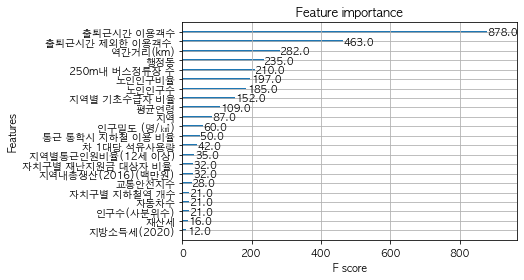

In [23]:
# XGBoost 주요변수 추출
xgb_model = XGBRegressor()
xgb_model.fit(dff.drop(['무임승하차'], axis = 1), dff.무임승하차)

plot_importance(xgb_model)

from sklearn.metrics import r2_score
r2s = r2_score(dff.무임승하차, xgb_model.predict(dff.drop(['무임승하차'], axis = 1)))
print(f'결정계수 : {r2s}')

## **다중선형회귀분석**

In [24]:
select_cols = corr_with_target[corr_with_target >= 0.1]
select_cols

무임승하차                 1.000000
출퇴근시간 제외한 이용객수        0.724782
출퇴근시간 이용객수            0.677748
유임승하차                 0.652643
250m내 버스정류장 수         0.280938
무임승하차비율               0.261382
자치구별 지하철역 개수          0.226735
지역별통근인원비율(12세 이상)     0.204193
평균연령                  0.194496
노인인구비율                0.177797
자동차수                  0.176656
지역별 기초수급자 비율          0.176445
자동차세                  0.162933
역간거리(km)              0.161434
석유사용량(bbl)            0.134878
통근 통학시 지하철 이용 비율      0.133556
자치구별 재난지원금 대상자 비율     0.129932
차 1대당 석유사용량           0.125290
교통안전지수                0.114848
dtype: float64

In [25]:
ddd = select_cols.index.tolist()
ddd.remove('무임승하차')

In [26]:
# train, test 데이터 분리하기 (8:2)
# 상관계수가 0.1 이상인 변수들을 넣은 뒤 후진제거법을 활용해 다차원 회귀분석 시행

x = df[ddd]
y = df[['무임승하차']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [27]:
#학습
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [28]:
y_predict = mlr.predict(x_test)

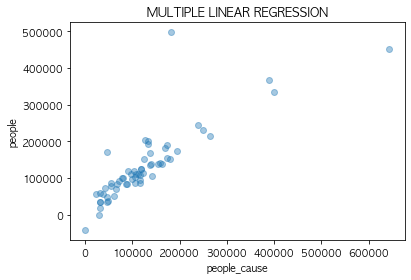

In [29]:
# 산점도 시각화
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("people_cause")
plt.ylabel("people")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [30]:
#스코어
print(mlr.score(x_train, y_train))

0.8485502641985403


In [31]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              233.5
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   6.75e-157
Time:                        19:44:25   Log-Likelihood:                         -3607.1
No. Observations:                 298   AIC:                                      7250.
Df Residuals:                     280   BIC:                                      7317.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수         0.2236      0.031      7.280      0.000       0.163       0.284
출퇴근시간 이용객수             0.2561      0.046      5.549      0.000       0.165       0.347
유임승하차                 -0.1388      0.031     -4.511      0.000      -0.199      -0.078
250m내 버스정류장 수        534.7032    777.169      0.688      0.492    -995.133    2064.539
무임승하차비율             7005.2630    544.656     12.862      0.000    5933.124    8077.402
자치구별 지하철역 개수        -938.0287    792.078     -1.184      0.237   -2497.213     621.155
지역별통근인원비율(12세 이상)  -3.019e+05   2.15e+05     -1.404      0.162   -7.25e+05    1.21e+05
평균연령                2954.1024   2037.815      1.450      0.148   -1057.280    6965.485
노인인구비율              1650.4681   1.49e+05      0.011      0.991   -2.92e+05    2.96e+05
자동차수                  -0.3302      0.290     -1.138      0.256      -0.902       0.241
지역별 기초수급자 비율       -7.633e+05   2.31e+06     -0.330      0.742   -5.32e+06    3.79e+06
자동차세                   1.3633      1.251      1.090      0.277      -1.099       3.825
역간거리(km)            2.256e+04   6735.745      3.349      0.001    9302.094    3.58e+04
석유사용량(bbl)             0.0704      0.119      0.589      0.556      -0.165       0.306
통근 통학시 지하철 이용 비율     233.8686    743.292      0.315      0.753   -1229.281    1697.018
자치구별 재난지원금 대상자 비율    162.9313    608.191      0.268      0.789   -1034.275    1360.138
차 1대당 석유사용량        -9266.4908   2.27e+04     -0.408      0.684    -5.4e+04    3.54e+04
교통안전지수              -608.3564   1794.419     -0.339      0.735   -4140.621    2923.908
==============================================================================
Omnibus:                       62.348   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.582
Skew:                          -0.351   Prob(JB):                    1.74e-173
Kurtosis:                      10.974   Cond. No.                     1.25e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 가장 높은 노인인구비율 변수 제거

In [32]:
# p-value가 가장 높은 노인인구비율 변수 제거
x = df[ddd].drop('노인인구비율',axis = 1)
y = df[['무임승하차']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [33]:
y_predict = mlr.predict(x_test)

In [34]:
print(mlr.score(x_train, y_train))

0.8734055880450367


In [35]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              248.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   4.22e-158
Time:                        19:44:25   Log-Likelihood:                         -3607.1
No. Observations:                 298   AIC:                                      7248.
Df Residuals:                     281   BIC:                                      7311.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수         0.2236      0.031      7.293      0.000       0.163       0.284
출퇴근시간 이용객수             0.2561      0.046      5.561      0.000       0.165       0.347
유임승하차                 -0.1388      0.031     -4.520      0.000      -0.199      -0.078
250m내 버스정류장 수        534.0495    773.536      0.690      0.491    -988.611    2056.710
무임승하차비율             7005.7721    541.739     12.932      0.000    5939.390    8072.154
자치구별 지하철역 개수        -940.0460    769.395     -1.222      0.223   -2454.555     574.463
지역별통근인원비율(12세 이상)  -3.024e+05    2.1e+05     -1.439      0.151   -7.16e+05    1.11e+05
평균연령                2972.6124   1159.238      2.564      0.011     690.720    5254.505
자동차수                  -0.3299      0.288     -1.144      0.253      -0.897       0.238
지역별 기초수급자 비율       -7.653e+05    2.3e+06     -0.332      0.740    -5.3e+06    3.77e+06
자동차세                   1.3618      1.241      1.097      0.273      -1.081       3.805
역간거리(km)            2.256e+04   6714.219      3.360      0.001    9340.709    3.58e+04
석유사용량(bbl)             0.0706      0.118      0.600      0.549      -0.161       0.302
통근 통학시 지하철 이용 비율     234.6511    738.596      0.318      0.751   -1219.232    1688.534
자치구별 재난지원금 대상자 비율    162.0661    602.060      0.269      0.788   -1023.053    1347.186
차 1대당 석유사용량        -9306.2386   2.24e+04     -0.416      0.678   -5.34e+04    3.48e+04
교통안전지수              -610.3058   1782.552     -0.342      0.732   -4119.156    2898.544
==============================================================================
Omnibus:                       62.340   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.755
Skew:                          -0.351   Prob(JB):                    1.60e-173
Kurtosis:                      10.975   Cond. No.                     1.24e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 가장 높은 자치구별 재난지원금 대상자 비율 제거

In [36]:
# p-value가 가장 높은 자치구별 재난지원금 대상자 비율 제거
x = x.drop('자치구별 재난지원금 대상자 비율 ',axis = 1)
y = df[['무임승하차']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [37]:
print(mlr.score(x_train, y_train))

0.8178455398331852


In [38]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              264.5
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   2.64e-159
Time:                        19:44:25   Log-Likelihood:                         -3607.1
No. Observations:                 298   AIC:                                      7246.
Df Residuals:                     282   BIC:                                      7305.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2228      0.030      7.316      0.000       0.163       0.283
출퇴근시간 이용객수            0.2567      0.046      5.588      0.000       0.166       0.347
유임승하차                -0.1382      0.031     -4.520      0.000      -0.198      -0.078
250m내 버스정류장 수       553.9152    768.740      0.721      0.472    -959.282    2067.112
무임승하차비율            7020.4304    538.108     13.047      0.000    5961.212    8079.649
자치구별 지하철역 개수       -955.4561    765.999     -1.247      0.213   -2463.258     552.346
지역별통근인원비율(12세 이상) -3.272e+05   1.89e+05     -1.735      0.084   -6.99e+05    4.41e+04
평균연령               3015.1478   1146.528      2.630      0.009     758.309    5271.987
자동차수                 -0.2983      0.263     -1.135      0.257      -0.816       0.219
지역별 기초수급자 비율      -6.873e+05   2.28e+06     -0.301      0.763   -5.18e+06     3.8e+06
자동차세                  1.2120      1.107      1.095      0.275      -0.968       3.391
역간거리(km)            2.25e+04   6699.559      3.358      0.001    9310.468    3.57e+04
석유사용량(bbl)            0.0719      0.117      0.612      0.541      -0.159       0.303
통근 통학시 지하철 이용 비율    321.4224    663.448      0.484      0.628    -984.517    1627.362
차 1대당 석유사용량       -8991.4309   2.23e+04     -0.403      0.687   -5.29e+04    3.49e+04
교통안전지수             -338.5498   1466.699     -0.231      0.818   -3225.618    2548.519
==============================================================================
Omnibus:                       62.079   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.505
Skew:                          -0.344   Prob(JB):                    2.99e-173
Kurtosis:                      10.970   Cond. No.                     1.23e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.23e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 가장 높은 교통안전지수 제거

In [39]:
# p-value가 가장 높은 자치구별 재난지원금 대상자 비율 제거
x = x.drop('교통안전지수',axis = 1)
y = df[['무임승하차']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [40]:
print(mlr.score(x_train, y_train))

0.8372217973058868


In [41]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              283.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   1.59e-160
Time:                        19:44:25   Log-Likelihood:                         -3607.1
No. Observations:                 298   AIC:                                      7244.
Df Residuals:                     283   BIC:                                      7300.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2222      0.030      7.334      0.000       0.163       0.282
출퇴근시간 이용객수            0.2578      0.046      5.659      0.000       0.168       0.348
유임승하차                -0.1380      0.031     -4.524      0.000      -0.198      -0.078
250m내 버스정류장 수       542.5794    765.885      0.708      0.479    -964.976    2050.134
무임승하차비율            7029.1847    535.871     13.117      0.000    5974.385    8083.984
자치구별 지하철역 개수       -840.9817    582.804     -1.443      0.150   -1988.163     306.200
지역별통근인원비율(12세 이상)  -3.67e+05   7.64e+04     -4.804      0.000   -5.17e+05   -2.17e+05
평균연령               2936.5159   1092.918      2.687      0.008     785.236    5087.796
자동차수                 -0.2964      0.262     -1.130      0.259      -0.813       0.220
지역별 기초수급자 비율      -7.293e+05   2.27e+06     -0.321      0.748    -5.2e+06    3.74e+06
자동차세                  1.2813      1.064      1.204      0.230      -0.813       3.376
역간거리(km)           2.243e+04   6681.643      3.357      0.001    9276.730    3.56e+04
석유사용량(bbl)            0.0650      0.113      0.573      0.567      -0.158       0.288
통근 통학시 지하철 이용 비율    270.4791    624.616      0.433      0.665    -959.004    1499.962
차 1대당 석유사용량       -7562.4804   2.14e+04     -0.353      0.724   -4.97e+04    3.46e+04
==============================================================================
Omnibus:                       61.980   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.310
Skew:                          -0.333   Prob(JB):                    1.35e-175
Kurtosis:                      11.026   Cond. No.                     1.23e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.23e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 가장 높은 지역별 기초수급자 비율 제거

In [42]:
# p-value가 가장 높은 지역별 기초수급자 비율 제거
x = x.drop('지역별 기초수급자 비율',axis = 1)
y = df[['무임승하차']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [43]:
print(mlr.score(x_train, y_train))

0.8158610002484948


In [44]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              304.3
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   9.39e-162
Time:                        19:44:25   Log-Likelihood:                         -3607.2
No. Observations:                 298   AIC:                                      7242.
Df Residuals:                     284   BIC:                                      7294.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2222      0.030      7.346      0.000       0.163       0.282
출퇴근시간 이용객수            0.2589      0.045      5.705      0.000       0.170       0.348
유임승하차                -0.1383      0.030     -4.544      0.000      -0.198      -0.078
250m내 버스정류장 수       519.1444    761.199      0.682      0.496    -979.163    2017.452
무임승하차비율            7004.5010    529.497     13.229      0.000    5962.265    8046.737
자치구별 지하철역 개수       -808.2056    572.898     -1.411      0.159   -1935.871     319.460
지역별통근인원비율(12세 이상) -3.581e+05    7.1e+04     -5.040      0.000   -4.98e+05   -2.18e+05
평균연령               2762.1518    947.129      2.916      0.004     897.868    4626.435
자동차수                 -0.2991      0.262     -1.143      0.254      -0.814       0.216
자동차세                  1.2989      1.061      1.224      0.222      -0.789       3.387
역간거리(km)           2.245e+04   6670.760      3.365      0.001    9319.542    3.56e+04
석유사용량(bbl)            0.0610      0.113      0.542      0.588      -0.160       0.282
통근 통학시 지하철 이용 비율    270.5500    623.629      0.434      0.665    -956.971    1498.071
차 1대당 석유사용량       -6780.9881   2.12e+04     -0.319      0.750   -4.86e+04     3.5e+04
==============================================================================
Omnibus:                       62.177   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              812.976
Skew:                          -0.334   Prob(JB):                    2.91e-177
Kurtosis:                      11.064   Cond. No.                     3.85e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 가장 높은 차 1대당 석유사용량 제거

In [45]:
# p-value가 가장 높은 차 1대당 석유사용량 제거
x = x.drop('차 1대당 석유사용량',axis = 1)
y = df[['무임승하차']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [46]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [47]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              328.7
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   5.34e-163
Time:                        19:44:25   Log-Likelihood:                         -3607.2
No. Observations:                 298   AIC:                                      7240.
Df Residuals:                     285   BIC:                                      7289.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2227      0.030      7.385      0.000       0.163       0.282
출퇴근시간 이용객수            0.2571      0.045      5.716      0.000       0.169       0.346
유임승하차                -0.1383      0.030     -4.548      0.000      -0.198      -0.078
250m내 버스정류장 수       556.4933    750.975      0.741      0.459    -921.669    2034.655
무임승하차비율            7016.0098    527.436     13.302      0.000    5977.846    8054.174
자치구별 지하철역 개수       -870.2684    538.081     -1.617      0.107   -1929.386     188.849
지역별통근인원비율(12세 이상) -3.598e+05   7.07e+04     -5.086      0.000   -4.99e+05   -2.21e+05
평균연령               2755.7129    945.421      2.915      0.004     894.818    4616.607
자동차수                 -0.2589      0.229     -1.130      0.259      -0.710       0.192
자동차세                  1.2515      1.049      1.193      0.234      -0.813       3.316
역간거리(km)           2.274e+04   6599.516      3.445      0.001    9746.998    3.57e+04
석유사용량(bbl)            0.0259      0.024      1.088      0.277      -0.021       0.073
통근 통학시 지하철 이용 비율    178.6254    552.356      0.323      0.747    -908.589    1265.840
==============================================================================
Omnibus:                       61.858   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.125
Skew:                          -0.325   Prob(JB):                    1.21e-176
Kurtosis:                      11.051   Cond. No.                     3.84e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 가장 높은 통근 통학시 지하철 이용 비율 제거

In [48]:
# p-value가 가장 높은 통근 통학시 지하철 이용 비율 제거
x = x.drop('통근 통학시 지하철 이용 비율',axis = 1)
y = df[['무임승하차']]
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [49]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [50]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              357.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   2.91e-164
Time:                        19:44:25   Log-Likelihood:                         -3607.3
No. Observations:                 298   AIC:                                      7239.
Df Residuals:                     286   BIC:                                      7283.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2216      0.030      7.408      0.000       0.163       0.281
출퇴근시간 이용객수            0.2569      0.045      5.721      0.000       0.169       0.345
유임승하차                -0.1374      0.030     -4.544      0.000      -0.197      -0.078
250m내 버스정류장 수       556.0082    749.797      0.742      0.459    -919.813    2031.829
무임승하차비율            7007.9447    526.021     13.323      0.000    5972.582    8043.308
자치구별 지하철역 개수       -858.2730    535.960     -1.601      0.110   -1913.200     196.654
지역별통근인원비율(12세 이상) -3.525e+05    6.7e+04     -5.262      0.000   -4.84e+05   -2.21e+05
평균연령               2793.5287    936.692      2.982      0.003     949.844    4637.213
자동차수                 -0.2199      0.195     -1.130      0.259      -0.603       0.163
자동차세                  1.0782      0.900      1.198      0.232      -0.693       2.850
역간거리(km)           2.289e+04   6572.262      3.483      0.001    9953.659    3.58e+04
석유사용량(bbl)            0.0231      0.022      1.043      0.298      -0.021       0.067
==============================================================================
Omnibus:                       61.995   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.872
Skew:                          -0.336   Prob(JB):                    7.51e-175
Kurtosis:                      11.008   Cond. No.                     3.64e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# p-value가 가장 높은 250m내 버스정류장 수 제거
x = x.drop('250m내 버스정류장 수',axis = 1)
y = df[['무임승하차']]
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [52]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [53]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              390.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   1.89e-165
Time:                        19:44:25   Log-Likelihood:                         -3607.6
No. Observations:                 298   AIC:                                      7237.
Df Residuals:                     287   BIC:                                      7278.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2230      0.030      7.475      0.000       0.164       0.282
출퇴근시간 이용객수            0.2614      0.044      5.881      0.000       0.174       0.349
유임승하차                -0.1392      0.030     -4.618      0.000      -0.198      -0.080
무임승하차비율            6990.6767    525.093     13.313      0.000    5957.156    8024.198
자치구별 지하철역 개수       -900.1128    532.564     -1.690      0.092   -1948.339     148.114
지역별통근인원비율(12세 이상) -3.451e+05   6.62e+04     -5.213      0.000   -4.75e+05   -2.15e+05
평균연령               2806.7526    935.788      2.999      0.003     964.875    4648.630
자동차수                 -0.2112      0.194     -1.088      0.277      -0.593       0.171
자동차세                  1.0332      0.897      1.151      0.251      -0.733       2.799
역간거리(km)           2.238e+04   6531.586      3.427      0.001    9527.702    3.52e+04
석유사용량(bbl)            0.0214      0.022      0.972      0.332      -0.022       0.065
==============================================================================
Omnibus:                       62.906   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              819.903
Skew:                          -0.352   Prob(JB):                    9.13e-179
Kurtosis:                      11.095   Cond. No.                     3.60e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# p-value가 가장 높은 석유사용량(bbl)제거
x = x.drop('석유사용량(bbl)',axis = 1)
y = df[['무임승하차']]
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [55]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [56]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              429.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   1.43e-166
Time:                        19:44:25   Log-Likelihood:                         -3608.1
No. Observations:                 298   AIC:                                      7236.
Df Residuals:                     288   BIC:                                      7273.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2236      0.030      7.497      0.000       0.165       0.282
출퇴근시간 이용객수            0.2623      0.044      5.901      0.000       0.175       0.350
유임승하차                -0.1401      0.030     -4.651      0.000      -0.199      -0.081
무임승하차비율            6962.2466    524.228     13.281      0.000    5930.442    7994.051
자치구별 지하철역 개수       -815.8750    525.421     -1.553      0.122   -1850.027     218.277
지역별통근인원비율(12세 이상) -3.453e+05   6.62e+04     -5.218      0.000   -4.76e+05   -2.15e+05
평균연령               2755.4374    934.210      2.949      0.003     916.692    4594.182
자동차수                 -0.1076      0.162     -0.664      0.507      -0.427       0.212
자동차세                  0.6422      0.802      0.801      0.424      -0.937       2.221
역간거리(km)           2.258e+04   6527.776      3.459      0.001    9733.946    3.54e+04
==============================================================================
Omnibus:                       63.010   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.382
Skew:                          -0.346   Prob(JB):                    1.08e-181
Kurtosis:                      11.163   Cond. No.                     3.59e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# p-value가 가장 높은 자동차수 제거
x = x.drop('자동차수',axis = 1)
y = df[['무임승하차']]
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [58]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [59]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              477.8
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   7.89e-168
Time:                        19:44:25   Log-Likelihood:                         -3608.3
No. Observations:                 298   AIC:                                      7235.
Df Residuals:                     289   BIC:                                      7268.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2258      0.030      7.622      0.000       0.167       0.284
출퇴근시간 이용객수            0.2617      0.044      5.895      0.000       0.174       0.349
유임승하차                -0.1413      0.030     -4.706      0.000      -0.200      -0.082
무임승하차비율            6922.3895    520.273     13.305      0.000    5898.386    7946.393
자치구별 지하철역 개수       -808.2034    524.785     -1.540      0.125   -1841.089     224.682
지역별통근인원비율(12세 이상) -3.444e+05   6.61e+04     -5.211      0.000   -4.75e+05   -2.14e+05
평균연령               2713.2212    931.139      2.914      0.004     880.547    4545.895
자동차세                  0.1527      0.315      0.485      0.628      -0.467       0.772
역간거리(km)           2.246e+04   6518.874      3.445      0.001    9629.824    3.53e+04
==============================================================================
Omnibus:                       63.248   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.917
Skew:                          -0.334   Prob(JB):                    4.17e-188
Kurtosis:                      11.310   Cond. No.                     3.58e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# p-value가 가장 높은 자동차세 제거
x = x.drop('자동차세',axis = 1)
y = df[['무임승하차']]
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [61]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [62]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              538.9
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   3.70e-169
Time:                        19:44:25   Log-Likelihood:                         -3608.4
No. Observations:                 298   AIC:                                      7233.
Df Residuals:                     290   BIC:                                      7262.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2259      0.030      7.636      0.000       0.168       0.284
출퇴근시간 이용객수            0.2628      0.044      5.937      0.000       0.176       0.350
유임승하차                -0.1418      0.030     -4.729      0.000      -0.201      -0.083
무임승하차비율            6947.5089    517.006     13.438      0.000    5929.949    7965.069
자치구별 지하철역 개수       -643.8590    400.235     -1.609      0.109   -1431.592     143.874
지역별통근인원비율(12세 이상) -3.265e+05   5.47e+04     -5.969      0.000   -4.34e+05   -2.19e+05
평균연령               2451.6816    758.148      3.234      0.001     959.511    3943.853
역간거리(km)           2.304e+04   6400.716      3.599      0.000    1.04e+04    3.56e+04
==============================================================================
Omnibus:                       63.982   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              878.415
Skew:                          -0.347   Prob(JB):                    1.80e-191
Kurtosis:                      11.382   Cond. No.                     2.97e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# p-value가 가장 높은 자치구별 지하철역 개수 제거
x = x.drop('자치구별 지하철역 개수',axis = 1)
y = df[['무임승하차']]
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

In [64]:
print(mlr.score(x_train, y_train))

0.8282789656186194


In [65]:
model = sm.OLS(y, x).fit() #OLS 검정

model.summary() # 결과 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  무임승하차   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              612.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                   5.22e-170
Time:                        19:44:26   Log-Likelihood:                         -3609.7
No. Observations:                 298   AIC:                                      7233.
Df Residuals:                     291   BIC:                                      7259.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
출퇴근시간 제외한 이용객수        0.2275      0.030      7.674      0.000       0.169       0.286
출퇴근시간 이용객수            0.2645      0.044      5.960      0.000       0.177       0.352
유임승하차                -0.1429      0.030     -4.754      0.000      -0.202      -0.084
무임승하차비율            7065.9736    513.129     13.770      0.000    6056.059    8075.888
지역별통근인원비율(12세 이상) -3.602e+05   5.07e+04     -7.111      0.000    -4.6e+05   -2.61e+05
평균연령               2572.1647    756.496      3.400      0.001    1083.268    4061.061
역간거리(km)           2.407e+04   6385.751      3.770      0.000    1.15e+04    3.66e+04
==============================================================================
Omnibus:                       66.126   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.383
Skew:                          -0.401   Prob(JB):                    1.01e-194
Kurtosis:                      11.444   Cond. No.                     2.74e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

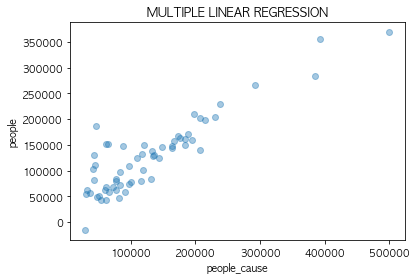

In [66]:
# 산점도 시각화
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("people_cause")
plt.ylabel("people")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()